In [32]:
import pandas as pd 
import numpy as np 


In [33]:
def read_tsv(file_path):
    return pd.read_csv(file_path, sep='\t', encoding='latin1')

data = read_tsv('../Data/rt.reviews.tsv')
data.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [34]:
# Start data cleaning process
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [35]:
# check if there are any missing values
data.isnull().sum()



id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [36]:
# if there are missing values, we can drop them
data = data.dropna()


In [37]:
# check again for missing values
data.isnull().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [38]:
# Check for any duplicates
data.duplicated().sum()

np.int64(0)

In [39]:
# Other ways for data cleaning are like removing special characters, converting text to lowercase, removing stop words, and stemming or lemmatization.
# So in our tsv file we have reviews column which contains text data. We will perform text cleaning on that column.
import re # this is for regular expressions meaning removing special characters
from nltk.stem import PorterStemmer # this is for stemming 

# Initialize the stemmer
stemmer = PorterStemmer()

# Define a function for text cleaning
def clean_text(text):
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Perform stemming ( Stemming is the process of reducing a word to its root form example: running -> run )
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Apply the cleaning function to the reviews column
data['review'] = data['review'].apply(clean_text)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [41]:
# Step 1: Keep only valid letter grades
letter_grades = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D", "F"]
data['rating_clean'] = data['rating'].apply(lambda x: x if x in letter_grades else np.nan)

# Step 2: Map letter grades to descriptive labels
grade_mapping = {
    'A+': 'Excellent', 'A': 'Excellent', 'A-': 'Excellent',
    'B+': 'Above Average', 'B': 'Above Average', 'B-': 'Above Average',
    'C+': 'Average', 'C': 'Average', 'C-': 'Average',
    'D': 'Below Average',
    'F': 'Fail'
}

data['rating_clean'] = data['rating_clean'].map(grade_mapping)

# Step 3: Optionally, drop rows with NaN (non-letter grades)
data = data.dropna(subset=['rating_clean'])

data.head()


,id,review,rating,fresh,critic,top_critic,publisher,date,rating_clean
6,3,quickli grow repetit and tiresom meander towar...,C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",Average
11,3,while not one of cronenberg s stronger film th...,B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",Above Average
13,3,the anger over the injustic of the financi col...,B,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013",Above Average
17,3,it major problem is that it s not cinemat,B,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012",Above Average
34,3,i don t know if delillo s fetish doubletalk ev...,C,rotten,Vincent Mancini,0,FilmDrunk,"August 30, 2012",Average


In [42]:
data.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,rating_clean
6,3,quickli grow repetit and tiresom meander towar...,C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",Average
11,3,while not one of cronenberg s stronger film th...,B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",Above Average
13,3,the anger over the injustic of the financi col...,B,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013",Above Average
17,3,it major problem is that it s not cinemat,B,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012",Above Average
34,3,i don t know if delillo s fetish doubletalk ev...,C,rotten,Vincent Mancini,0,FilmDrunk,"August 30, 2012",Average


In [43]:
# Making a new cleaned data file
data.to_csv('../Data/cleaned_rt_reviews.csv', index=False)
data.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,rating_clean
6,3,quickli grow repetit and tiresom meander towar...,C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",Average
11,3,while not one of cronenberg s stronger film th...,B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",Above Average
13,3,the anger over the injustic of the financi col...,B,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013",Above Average
17,3,it major problem is that it s not cinemat,B,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012",Above Average
34,3,i don t know if delillo s fetish doubletalk ev...,C,rotten,Vincent Mancini,0,FilmDrunk,"August 30, 2012",Average


## Load datasets


In [44]:
df1 = pd.read_csv('../Data/cleaned_movie_budgets.csv')
df1.head()


,release_date,title,production_budget,domestic_gross,worldwide_gross,year
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


In [64]:
df2 = pd.read_csv(r'../Notebooks/cleaned_dataset.tsv', sep='\t')
df2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,$,14141054.5,104.0,Unknown
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,$,14141054.5,116.0,Unknown
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,$,14141054.5,128.0,Unknown
4,7,No synopsis,NR,Drama|Romance,Rodney Bennett,Giles Cooper,1997-01-01,2004-06-01,$,14141054.5,200.0,Unknown


In [46]:
df3 = pd.read_csv('../Data/tmdb.movies.csv')
df3.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Statistics of each dataset  

In [47]:
df1.describe()


,production_budget,domestic_gross,worldwide_gross,year
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139
std,4.181208e+07,6.824060e+07,1.747200e+08,12.724386
min,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000
50%,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000
75%,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000
max,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000


In [48]:
df2.describe()

,domestic_gross,foreign_gross
count,3.359000e+03,2.037000e+03
mean,2.874585e+07,7.487281e+07
std,6.698250e+07,1.374106e+08
min,1.000000e+02,6.000000e+02
25%,1.200000e+05,3.700000e+06
50%,1.400000e+06,1.870000e+07
75%,2.790000e+07,7.490000e+07
max,9.367000e+08,9.605000e+08


In [49]:
df3.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


## Finding the relationships


# Correlation
#### The next step we need to do is to get the correlation between  datasets that have two related columns.

In [50]:
# finding correlations between datasets
## Finding the relationships
merged_df1_df3 = pd.merge(df1, df3, left_on='title', right_on='title', how='inner')
merged_df1_df3 


,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2015-09-01,Exeter,25000.0,0.0,4.897920e+05,2015,14678,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,4.7,121
2381,2015-04-21,Ten,25000.0,0.0,0.000000e+00,2015,12326,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,5.4,5
2382,2014-12-31,Dry Spell,22000.0,0.0,0.000000e+00,2014,10470,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,6.0,1
2383,2013-01-04,All Superheroes Must Die,20000.0,0.0,0.000000e+00,2013,8893,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,3.9,19


In [51]:
# create a new domestic profit column
domestic_profit = merged_df1_df3['domestic_gross'] - merged_df1_df3['production_budget']
merged_df1_df3['domestic_profit'] = domestic_profit
merged_df1_df3.head()

,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count,domestic_profit
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676,335507625.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,-169536125.0
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,128405868.0
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,378815482.0
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510,-70975705.0


In [52]:
# worldwide profit
worldwide_profit = merged_df1_df3['worldwide_gross'] - merged_df1_df3['production_budget']
merged_df1_df3['worldwide_profit'] = worldwide_profit
merged_df1_df3.head()

,release_date_x,title,production_budget,domestic_gross,worldwide_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count,domestic_profit,worldwide_profit
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676,335507625.0,2.351345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,-169536125.0,6.350639e+08
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,128405868.0,1.072414e+09
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,378815482.0,1.748134e+09
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510,-70975705.0,3.559452e+08


##  Data Visualizations

## 1. Domestic profit vs Worldwide_profit

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


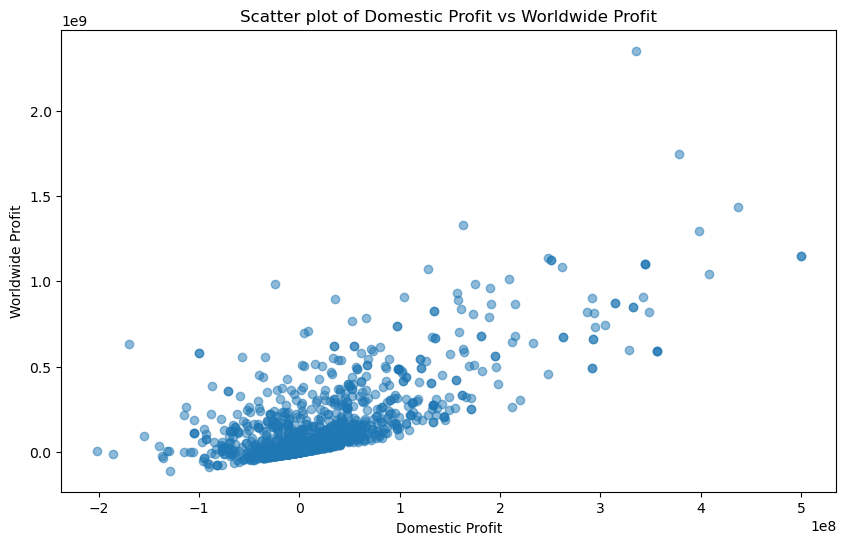

In [54]:
# plot a scatter plot to visualize the relationship between domestic profit and worldwide profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['domestic_profit'], merged_df1_df3['worldwide_profit'], alpha=0.5)
plt.xlabel('Domestic Profit')
plt.ylabel('Worldwide Profit')
plt.title('Scatter plot of Domestic Profit vs Worldwide Profit')
plt.show()

### This scatter plot shows the correlation bettwen two domestic and worldwide profits

#### There’s a **strong positive correlation** between **Domestic Profit** and **Worldwide Profit** — movies that earn more domestically usually also earn more worldwide. A few outliers show that some films with weak domestic profits can still succeed globally.


## 2. Production budget vs worldwide profit


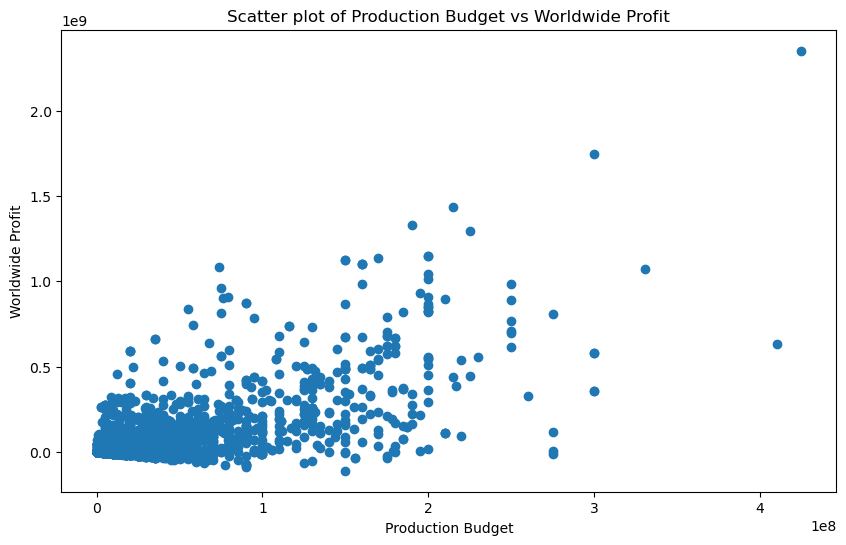

In [55]:
# scatter plot of production budget vs worldwide profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['production_budget'], merged_df1_df3['worldwide_profit'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Profit')
plt.title('Scatter plot of Production Budget vs Worldwide Profit')
plt.show()

#### Based on the plot shown above , it shows that whenever the production budget increases there is also an increase in profits world wide.Successful films usually have moderate to high production budgets that translate into high worldwide profits. However, spending a lot doesn’t guarantee success—efficient use of the budget and global appeal are key to making strong profits.

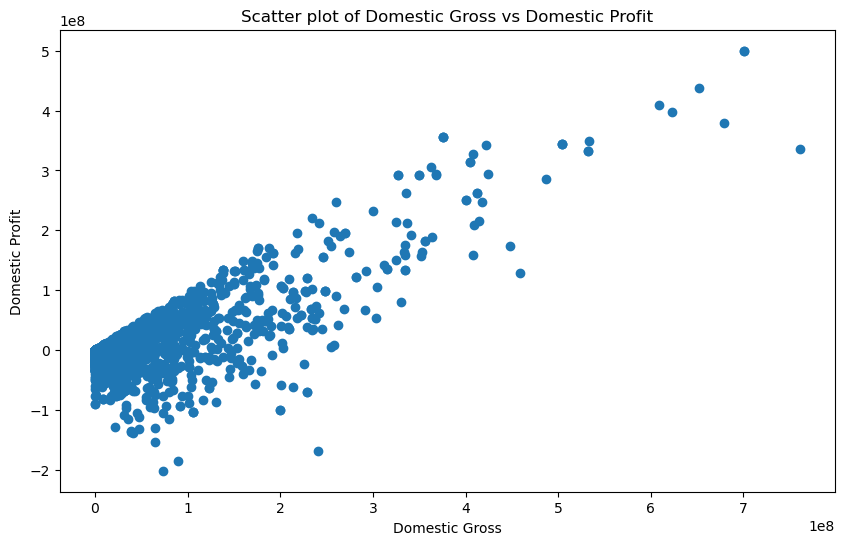

In [56]:
# scatter plot of domestic gross vs domestic profit
plt.figure(figsize=(10, 6))
plt.scatter(merged_df1_df3['domestic_gross'], merged_df1_df3['domestic_profit'])
plt.xlabel('Domestic Gross')
plt.ylabel('Domestic Profit')
plt.title('Scatter plot of Domestic Gross vs Domestic Profit')
plt.show()

/tmp/ipykernel_4880/1150159285.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_domestic_gross = merged_df1_df3.groupby('year_range')['domestic_gross'].mean().reset_index()
/tmp/ipykernel_4880/1150159285.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_range', y='domestic_gross', data=avg_domestic_gross, palette='viridis')


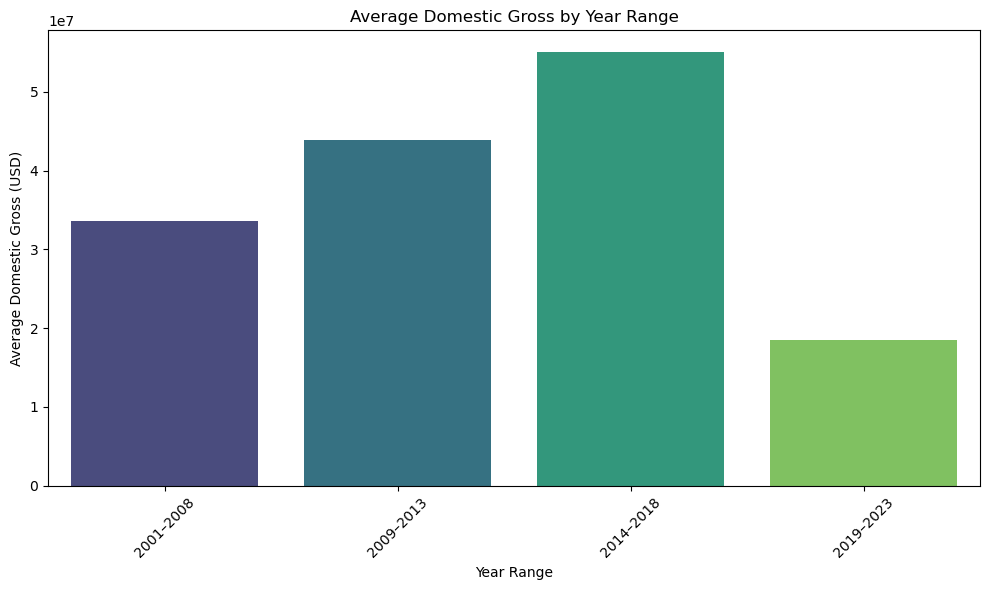

In [57]:
# Define the year ranges (bins)
bins = [2000, 2008, 2013, 2018, 2023]  # adjust as needed
labels = ['2001–2008', '2009–2013', '2014–2018', '2019–2023']

# Create a new column that categorizes each movie into a year range
merged_df1_df3['year_range'] = pd.cut(merged_df1_df3['year'], bins=bins, labels=labels, right=True)

# Group by year_range and calculate the average domestic gross
avg_domestic_gross = merged_df1_df3.groupby('year_range')['domestic_gross'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='year_range', y='domestic_gross', data=avg_domestic_gross, palette='viridis')

plt.title('Average Domestic Gross by Year Range')
plt.xlabel('Year Range')
plt.ylabel('Average Domestic Gross (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  A histogram presenting production budgets

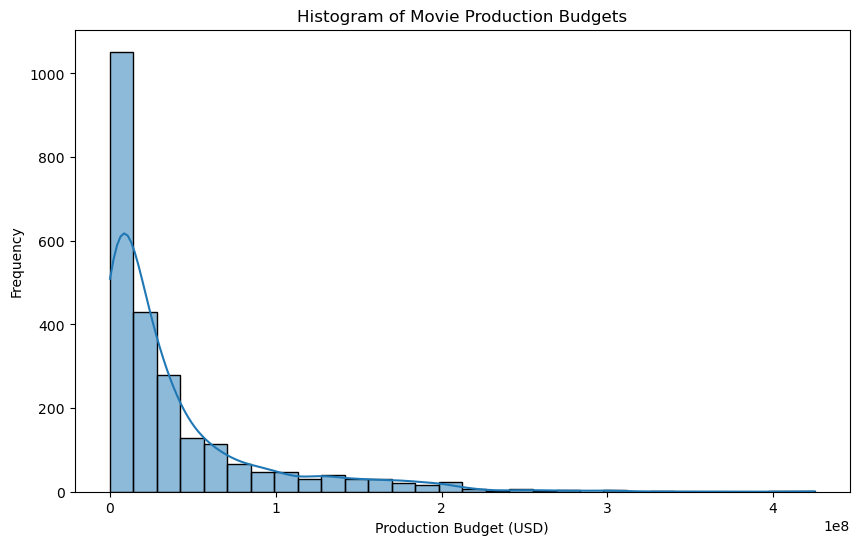

In [58]:
# create a histogram of production budgets
plt.figure(figsize=(10, 6))
sns.histplot(merged_df1_df3['production_budget'], bins=30, kde=True)
plt.title('Histogram of Movie Production Budgets')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Frequency')
plt.show()

#### This histogram shows that **most movies have relatively low production budgets**, while only a few films are made with very high budgets. The distribution is **right-skewed**, meaning a large number of movies are produced with smaller investments, and only a small portion of films (typically major blockbusters) spend millions on production. In short, the film industry is dominated by **low- to mid-budget productions**, with **high-budget films being rare but significant** outliers.
